### Boston housing predections using popular regression algorithms

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
data= load_boston()

C:\Users\22789\Downloads\WPy64-31040\python-3.10.4.amd64\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include 

In [4]:
#Checking various elements/parameters of the data
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
#Checking the data's descreption
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
#Printing data of the data set
print(data.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
#Printing the taget variable- The median value- the 14th column
print(data.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [8]:
#Printingthe column names/ Feature names:
print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
#Assigning the column names
boston_features = data.feature_names

In [10]:
#preparing the data frame:
boston_df = pd.DataFrame(data.data, columns = boston_features)

In [11]:
#Printing top 5 rows of the data set
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Here we can see that the target variable is not added, so we'll add the target column inthe below steps

In [12]:
boston_df["PRICE"] = data.target

In [13]:
#Checking the new aadded column in the dataframe
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
#Statistical description of the data set
boston_df.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
#Checking the Transpose of the overall description of the dataset
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [16]:
# Checking the data type of each column variable
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [17]:
#Checking the information of data set
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [18]:
#Checking the null values in data set
boston_df.isnull().value_counts()

CRIM   ZN     INDUS  CHAS   NOX    RM     AGE    DIS    RAD    TAX    PTRATIO  B      LSTAT  PRICE
False  False  False  False  False  False  False  False  False  False  False    False  False  False    506
dtype: int64

In [19]:
#Checking the null values in data set
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [20]:
#Finding correlation between numerical columns in the data set:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [21]:
#Checking the shape of the dataframe used
boston_df.shape

(506, 14)

<AxesSubplot:>

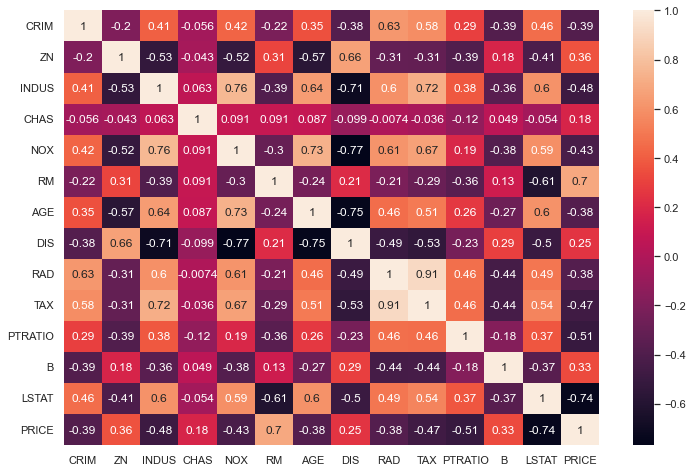

In [22]:
#Plotting the heatmap of correlations between the numerical variables
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(boston_df.corr(),annot=True)

### Data Visualization - Performing Basic EDA operations

### 1.Pairplot

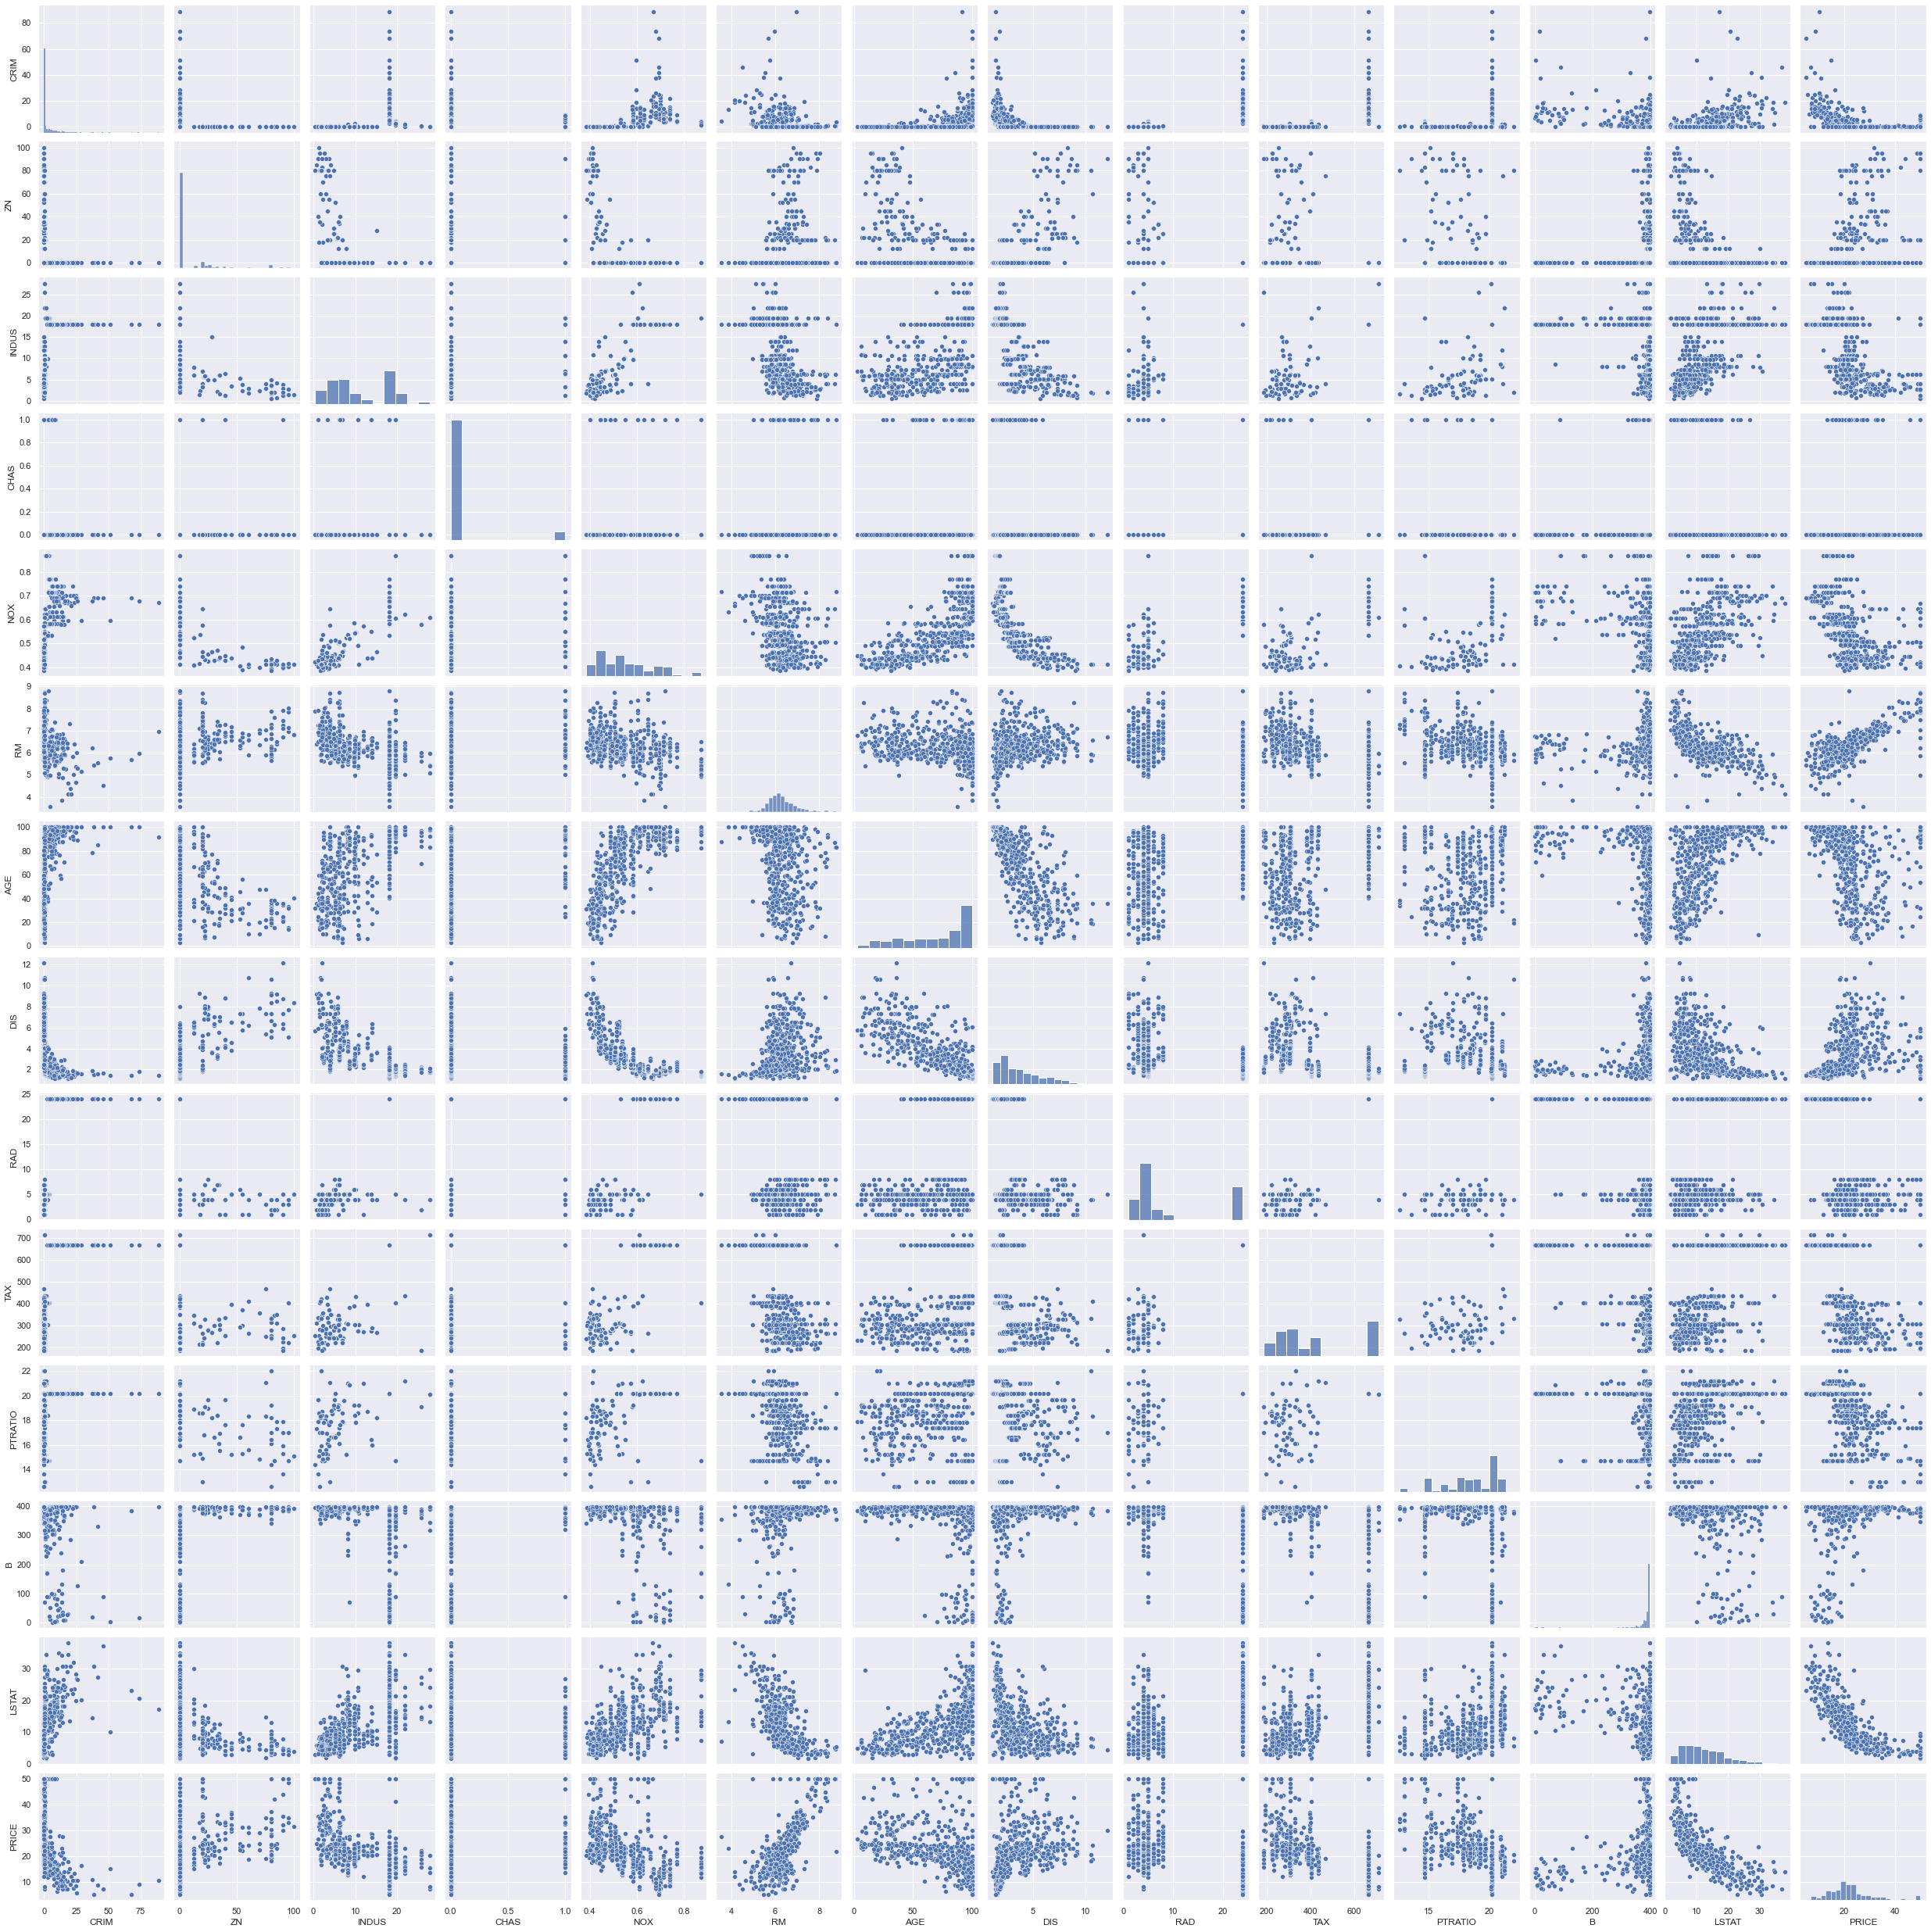

In [23]:
sns.pairplot(boston_df)

Text(0, 0.5, 'Price')

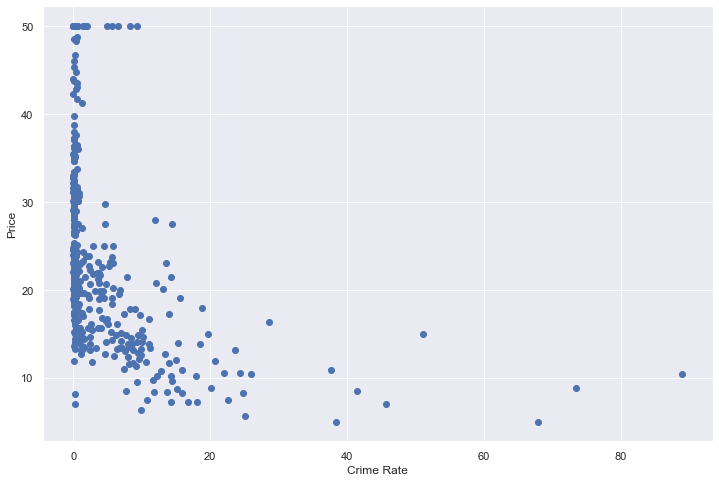

In [24]:
#plotting scatter plot between Crime and Price
plt.scatter(boston_df['CRIM'],boston_df['PRICE'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

<AxesSubplot:xlabel='CRIM', ylabel='PRICE'>

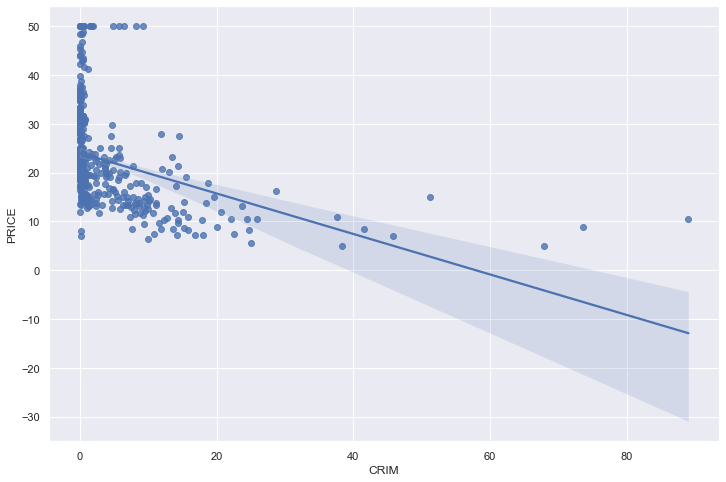

In [25]:
#plotting scatter plot between Crime and Price
sns.regplot(x="CRIM",y="PRICE",data=boston_df)

Text(0, 0.5, 'Price')

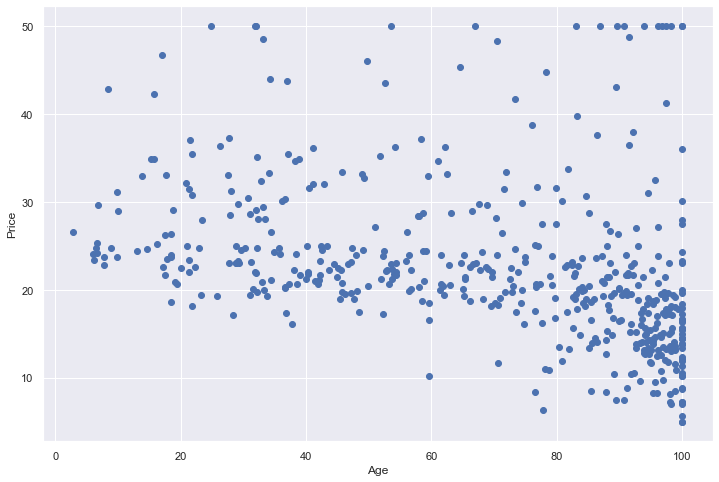

In [26]:
#plotting scatter plot between Crime and Price
plt.scatter(boston_df['AGE'],boston_df['PRICE'])
plt.xlabel("Age")
plt.ylabel("Price")

<AxesSubplot:xlabel='AGE', ylabel='PRICE'>

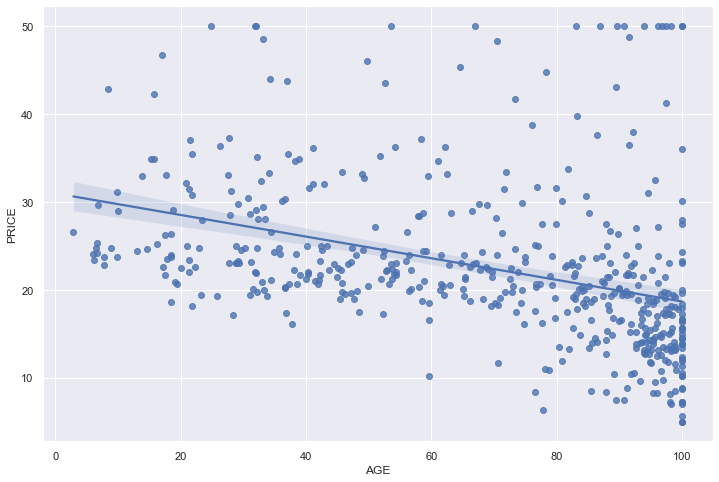

In [27]:
#plotting scatter plot between Crime and Price
sns.regplot(x="AGE",y="PRICE",data=boston_df)

Text(0, 0.5, 'Price')

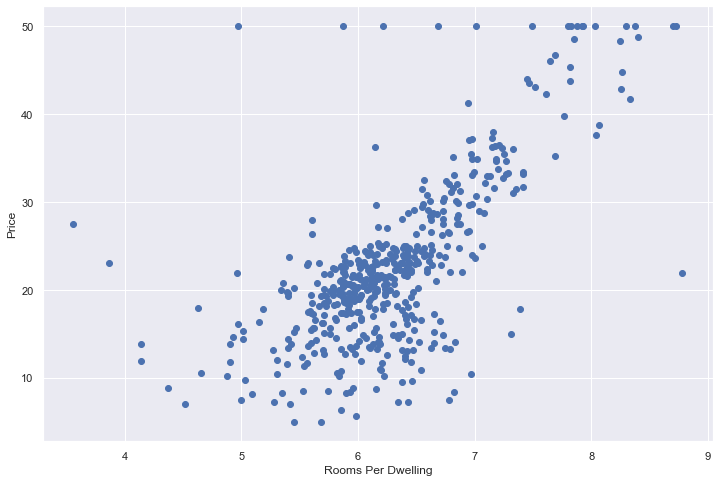

In [28]:
#ScatterPlot - ROOMS vs PRICE
plt.scatter(boston_df['RM'],boston_df['PRICE'])
plt.xlabel("Rooms Per Dwelling")
plt.ylabel("Price")

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

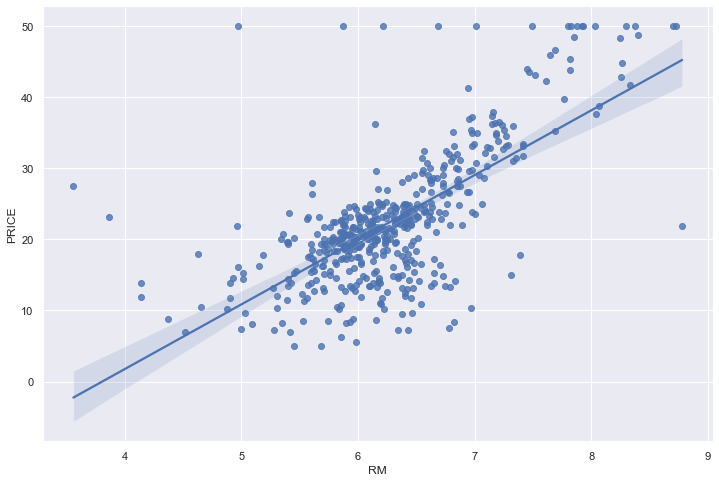

In [29]:
#ScatterPlot - ROOMS vs PRICE
sns.regplot(x="RM",y="PRICE",data=boston_df)

C:\Users\22789\Downloads\WPy64-31040\python-3.10.4.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM'>

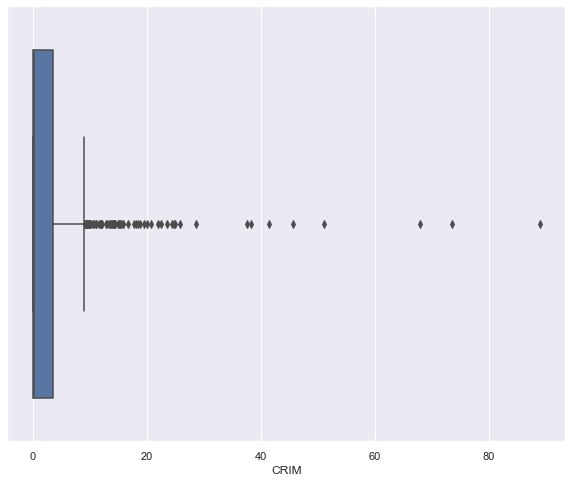

In [30]:
#Box plot of Crimerate to understand the distribution of values:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(boston_df['CRIM'])

C:\Users\22789\Downloads\WPy64-31040\python-3.10.4.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

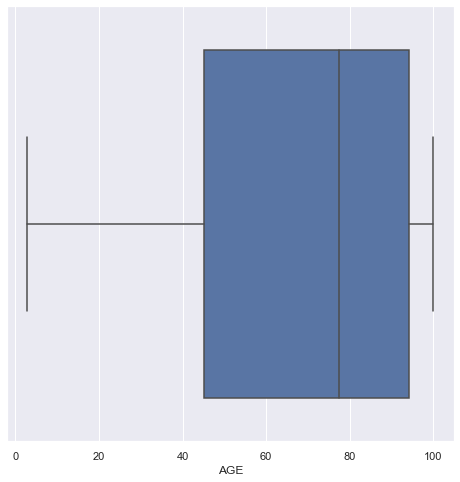

In [31]:
#Box plot of Age to understand the distribution of values and outliers:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(boston_df['AGE'])

C:\Users\22789\Downloads\WPy64-31040\python-3.10.4.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRICE'>

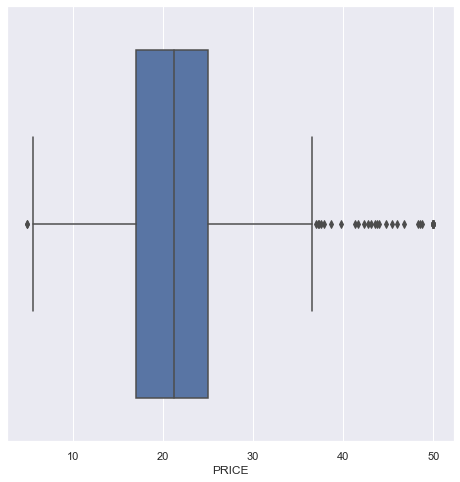

In [32]:
#Detecting the outliers present in the PRICE Column using Box-Plot
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(boston_df['PRICE'])

In [33]:
#Visualizing the DataFrame at a Glance using Pandas .head function
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
# Splitting the Dataset into Features and Label
X = boston_df.iloc[:,:-1]
Y = boston_df.iloc[:,-1]

### Model Training

In [35]:
from sklearn.model_selection import train_test_split
#Splitting the dataset into Train and Test Data into 70% and 30% Respectively
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [36]:
# Scaling the Train and Test Data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X_train_scaled = scaler.fit_transform(X_train)

In [38]:
X_test_scaled = scaler.fit_transform(X_test)

In [39]:
X_train_scaled

array([[-0.3514929 , -0.50879231, -0.50513134, ...,  0.54693908,
         0.40393604, -0.89644392],
       [-0.39020931,  2.0889838 , -1.15323355, ..., -1.31744643,
         0.13573752, -1.14167021],
       [ 0.74524924, -0.50879231,  1.05613958, ...,  0.82659691,
         0.127904  ,  1.1034188 ],
       ...,
       [-0.32786132,  0.35713306, -1.00176696, ..., -2.52929701,
         0.31630682, -1.31361049],
       [-0.38864027,  2.73842783, -1.15032073, ..., -0.05898621,
         0.38707405, -1.15012629],
       [-0.38744927,  2.95490917, -1.35858728, ..., -2.71573557,
         0.34153341, -0.82597659]])

In [40]:
X_test_scaled

array([[-0.48075128, -0.44062373,  0.01792148, ...,  1.12530883,
         0.53803973, -0.71798455],
       [-0.37642313, -0.44062373,  1.48767713, ...,  1.21617042,
        -0.60654669,  0.59047593],
       [-0.48376848,  3.13979049, -1.63334013, ..., -0.55563058,
         0.53803973, -1.01075779],
       ...,
       [-0.35952748, -0.44062373,  1.14680007, ..., -1.73683124,
         0.08051234, -0.12966298],
       [-0.26027105, -0.44062373,  1.14680007, ..., -1.73683124,
         0.30253515, -1.29798082],
       [ 1.54537691, -0.44062373,  0.92840264, ...,  0.76186247,
        -2.6161005 ,  2.21946067]])

In [41]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [42]:
LR.fit(X_train,y_train)

LinearRegression()

In [43]:
print(LR.coef_)

[-1.02394457e-01  4.41014823e-02  1.66291823e-02  2.22025608e+00
 -1.51186020e+01  4.03612613e+00 -1.58228897e-02 -1.44558507e+00
  2.95642072e-01 -1.44483553e-02 -9.33627683e-01  6.40804197e-03
 -4.45977002e-01]


In [44]:
print(LR.intercept_)

35.146606407404974


In [45]:
#Prediction for the test data:
reg_pred = LR.predict(X_test)

Text(0, 0.5, 'Test Predicted Data')

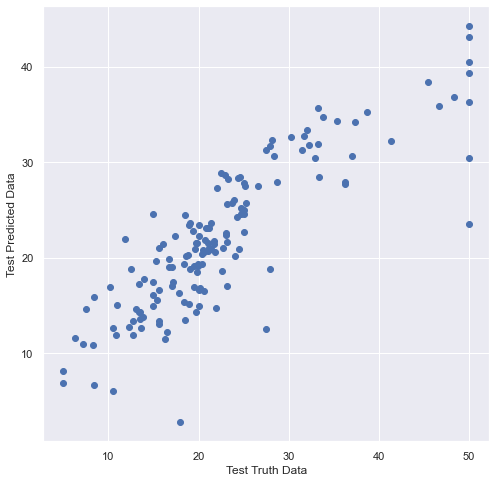

In [46]:
#Scatter plot between predicted data and original data
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [47]:
#Residuals
residuals=y_test-reg_pred
residuals

505    -9.989452
134     2.296034
56      0.189680
176    -2.422290
28     -0.868493
         ...    
228    10.871679
18      3.401080
152    -4.343480
166    13.710050
415    -3.696746
Name: PRICE, Length: 152, dtype: float64

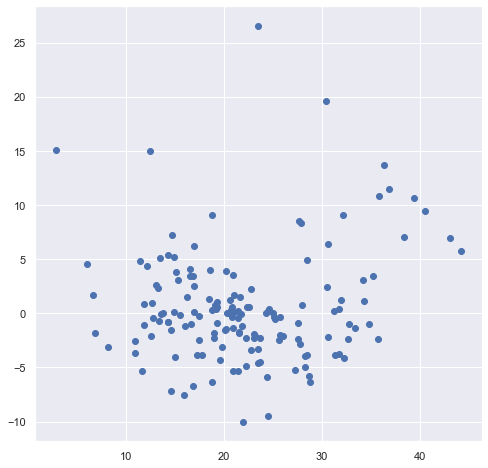

In [48]:
plt.scatter(reg_pred,residuals)

In [49]:
#Performance metrics:
from sklearn.metrics import mean_squared_error ## Mean Squared Error
#MAE: Mean Absolute Error
from sklearn.metrics import mean_absolute_error

In [50]:
#Printing errors:
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))


27.086544913219164
3.518378735970597
5.204473548133294


In [51]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

0.7238765357715646

In [52]:
#Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


0.6978649050833787

Replacing the Xtrain and Xtest Data with their scaled value and check whether there is any significant changes in the R^2

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [54]:
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [55]:
print(regressor.coef_)

[-0.86403335  1.01859777  0.11417931  0.57919313 -1.70626326  2.80279326
 -0.45183732 -3.08530527  2.51357689 -2.399047   -2.0030786   0.48263671
 -3.16442405]


In [56]:
print(regressor.intercept_)

22.523728813559323


In [57]:
reg_pred_scaled =  regressor.predict(X_test_scaled)
reg_pred_scaled

array([22.50370534, 14.41928862, 24.1671344 , 25.96980491, 19.62254745,
       23.07960167, 20.81983459, 17.35590881, 13.44408556, 12.46677737,
       28.86616947, 17.08995966, 32.04927548, 13.5389152 , 19.64457905,
       30.78240059, 16.11557411, 16.36691511, 19.23823519, 23.83974958,
       27.7545399 , 13.42576614, 19.55995134, 15.30952666, 24.13170417,
       42.68005494, 15.10470308, 24.28723656, 14.10188191, 19.16728171,
       16.29691379, 25.81405644, 20.96283702, 21.01510688, 18.93350095,
        4.60474301, 44.04728712, 18.81582079, 21.57054061, 19.69163694,
       19.41852934, 28.73340626,  7.03115637, 28.48595255, 23.24285756,
       16.10717248, 13.25824068, 17.50295005, 32.40310605, 16.62815329,
       39.31400087, 19.70307866, 15.20355465, 27.78581074, 25.30768128,
       34.12017922, 32.6477737 , 21.23018662, 28.14145114, 22.51799967,
        8.30036342, 24.92663098,  7.84852334, 31.73859235, 26.13037291,
       19.67865993, 23.90241363, 40.93826732, 15.56067212, 32.36

Text(0, 0.5, 'Test Predicted Data')

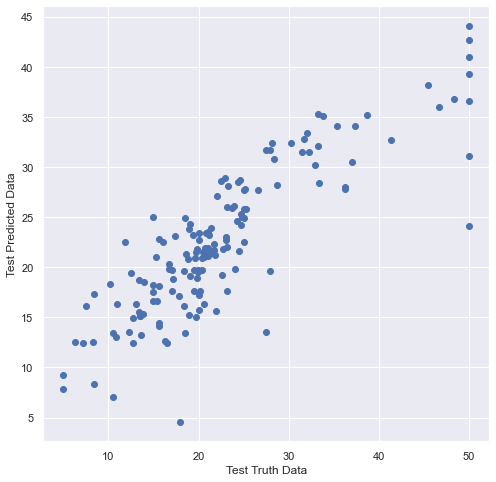

In [58]:
plt.scatter(y_test,reg_pred_scaled)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [59]:
#Residuals
residuals_scaled=y_test-reg_pred_scaled
residuals_scaled

505   -10.603705
134     1.180711
56      0.532866
176    -2.769805
28     -1.222547
         ...    
228    10.752194
18      2.575345
152    -5.721792
166    13.408329
415    -5.261747
Name: PRICE, Length: 152, dtype: float64

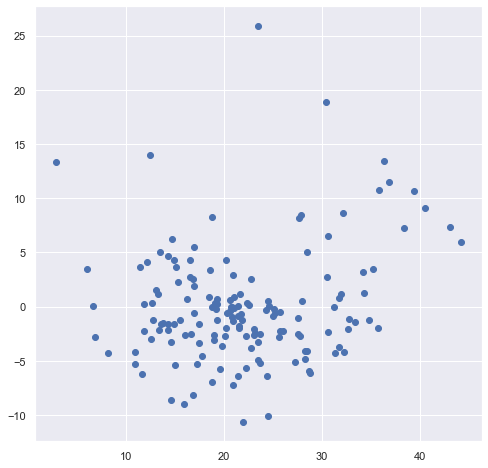

In [60]:
plt.scatter(reg_pred,residuals_scaled)

In [61]:
#performance metrics:
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE

In [62]:
print(mean_squared_error(y_test,reg_pred_scaled))
print(mean_absolute_error(y_test,reg_pred_scaled))
print(np.sqrt(mean_squared_error(y_test,reg_pred_scaled)))

27.607665821639372
3.69926715999513
5.2542997460783845


In [63]:
from sklearn.metrics import r2_score
score_scaled=r2_score(y_test,reg_pred_scaled)
print(score_scaled)

0.7185641671776422


In [64]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score_scaled)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6920520959697389

There is no such significant changes between the Normal and Scaled R^2 Values

### Evaluating the Dataset using Ridge Regression

In [65]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [66]:
ridge.fit(X_train, y_train)

Ridge()

In [67]:
ridge_pred = ridge.predict(X_test)
ridge_pred

array([22.26028471, 13.40063183, 24.81278734, 25.65788831, 19.4715858 ,
       21.85254699, 19.85476839, 16.28291878, 13.03971502, 11.96573966,
       28.16735876, 16.28281806, 31.58762042, 12.75367654, 18.57623791,
       30.52502624, 15.46876934, 15.11875068, 19.47259698, 23.38753444,
       27.74921257, 13.19565852, 19.65883398, 15.16060627, 23.06176467,
       42.76838908, 14.04798862, 23.19338944, 14.38549051, 18.34767535,
       17.41138162, 25.88778993, 20.13713803, 20.31043591, 18.5789133 ,
        2.01412412, 43.9099911 , 16.70853086, 21.35960785, 19.00653723,
       18.83959652, 28.30708371,  6.00094976, 28.12670609, 22.63061277,
       14.58380247, 12.68974114, 16.38045802, 32.08992285, 14.32585887,
       38.96445738, 18.74097946, 15.12483619, 28.04928379, 25.38825397,
       34.02499512, 31.74093221, 20.94152077, 27.96363032, 20.89537434,
        7.06092283, 24.54265761,  6.78919338, 30.89753126, 25.61411401,
       19.58230401, 23.06615537, 40.04550779, 14.68690948, 32.24

Text(0, 0.5, 'Test Predicted Data')

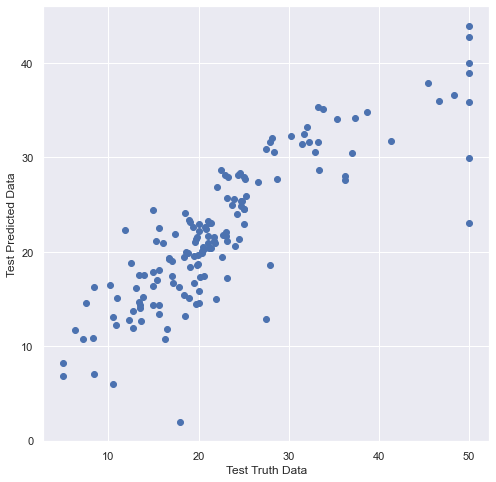

In [68]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [69]:
#Residuals
ridge_residuals=y_test-ridge_pred
ridge_residuals

505   -10.360285
134     2.199368
56     -0.112787
176    -2.457888
28     -1.071586
         ...    
228    10.716491
18      2.820038
152    -5.844165
166    14.125386
415    -3.572754
Name: PRICE, Length: 152, dtype: float64

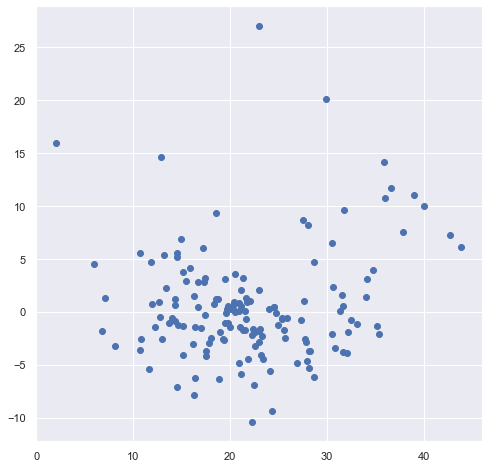

In [70]:
plt.scatter(ridge_pred,ridge_residuals)

In [71]:
#Checking the performance of the model:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

27.827388958170296
3.585079360640254
5.275167197176815


In [72]:
from sklearn.metrics import r2_score
ridge_score=r2_score(y_test,ridge_pred)
print(ridge_score)

0.7163242833598855


In [73]:
#Adjusted R square
#display adjusted R-squared
1 - (1-ridge_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6896012086039327

### Evaluating the Dataset using the Lasso Regression

In [74]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [75]:
lasso.fit(X_train,y_train)

Lasso()

In [76]:
print(lasso.intercept_)

45.60660487624352


In [77]:
print(lasso.coef_)

[-0.0551413   0.04833125 -0.          0.         -0.          0.68029015
  0.00641863 -0.77676111  0.25163406 -0.01682444 -0.74094268  0.00511531
 -0.71694257]


In [78]:
lasso_pred=lasso.predict(X_test)
lasso_pred

array([24.75850354, 15.15861354, 27.46091231, 25.98142218, 20.21735185,
       22.99532447, 19.84214225, 12.50673578, 13.50998222, 12.66782731,
       27.98562912, 15.83502428, 28.44922918, 12.66135623, 21.27557029,
       29.45748044, 17.4017764 , 13.34450378, 20.88461919, 24.8951425 ,
       28.00078321, 15.55702788, 22.64198965, 13.72469313, 23.96756497,
       38.1707015 , 15.28925255, 24.99024004, 15.3204343 , 18.34591595,
       22.42465794, 26.76165625, 19.85909609, 20.89393128, 19.71583174,
        2.52563025, 37.53471452, 13.64875123, 21.03837582, 18.67443025,
       16.96397313, 29.28640347,  8.55063643, 28.04835442, 23.9516571 ,
       10.27990194, 14.14417844, 14.81139556, 30.8619121 , 18.87974865,
       32.38774066, 17.96346405, 16.505981  , 27.47705049, 25.67671414,
       32.77599947, 31.58370458, 22.10119323, 27.85034058, 20.13638767,
        3.8693374 , 24.79748181,  6.65234975, 27.04231716, 25.78209393,
       19.81314541, 22.92634602, 33.33648215, 12.20342857, 30.13

Text(0, 0.5, 'Test Predicted Data')

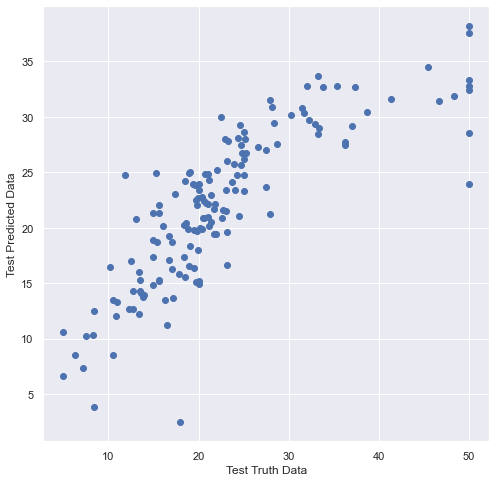

In [79]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [80]:
#Residuals
lasso_residuals=y_test-lasso_pred
lasso_residuals

505   -12.858504
134     0.441386
56     -2.760912
176    -2.781422
28     -1.817352
         ...    
228    15.317425
18      0.261195
152    -9.620900
166    17.259463
415    -0.182431
Name: PRICE, Length: 152, dtype: float64

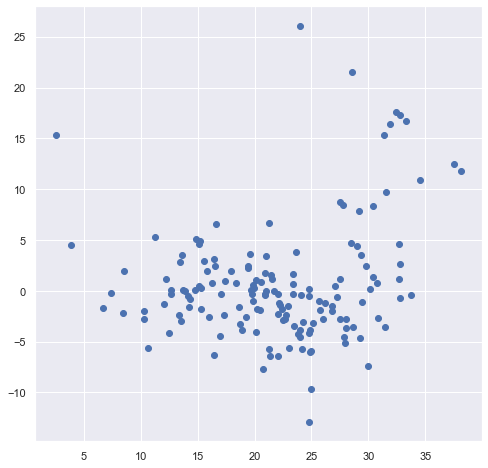

In [81]:
#Scatter plot with predictions and residual
#uniform distribution
plt.scatter(lasso_pred,lasso_residuals)

C:\Users\22789\Downloads\WPy64-31040\python-3.10.4.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='PRICE'>

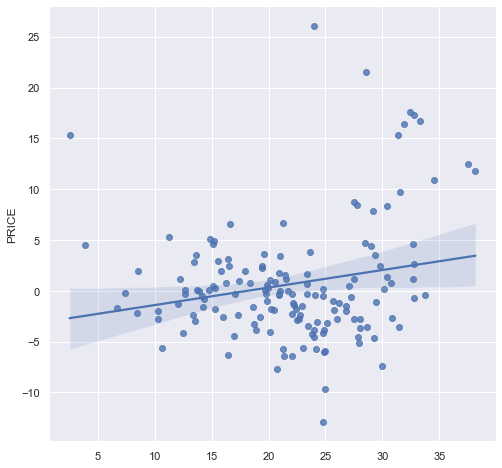

In [82]:
sns.regplot(lasso_pred,lasso_residuals)

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

33.69628785458957
3.8232478512180914
5.80485037314396


In [84]:
from sklearn.metrics import r2_score
lasso_score=r2_score(y_test,lasso_pred)
print(lasso_score)

0.6564960291592234


In [85]:
#Adjusted R square
#Display adjusted R-squared
1 - (1-lasso_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6241369594423387

### Evaluating the ElasticNet Regression

In [86]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

In [87]:
elasticnet

ElasticNet()

In [88]:
elasticnet.fit(X_train,y_train)

ElasticNet()

In [89]:
print(elasticnet.intercept_)

45.13254128419187


In [90]:
print(elasticnet.coef_)

[-0.07213996  0.05031947 -0.01149311  0.         -0.          0.85053619
  0.00555213 -0.83344598  0.2843761  -0.01778023 -0.75795945  0.00522893
 -0.70114289]


In [91]:
elasticnet_pred=elasticnet.predict(X_test)
elasticnet_pred

array([24.54515229, 14.83411296, 27.29013307, 26.04482255, 20.13453301,
       22.84599446, 19.8253417 , 12.7879391 , 13.45701892, 12.61030236,
       27.97315012, 15.65717417, 28.58932757, 12.84826202, 21.22046516,
       29.79770248, 17.07318957, 13.57064092, 21.00805645, 24.88034475,
       27.99867844, 15.4232198 , 22.41192491, 13.84892427, 24.03155709,
       38.66097938, 15.32478792, 24.79114684, 15.30681705, 18.4246247 ,
       22.04761801, 26.63229137, 19.84108897, 20.9406912 , 19.64175814,
        2.48876876, 37.9261414 , 13.83267953, 21.04098044, 18.47926761,
       17.25091113, 29.33096714,  8.37347864, 28.10783664, 23.90327798,
       10.60187996, 14.05834922, 14.99186228, 31.22022291, 18.10732782,
       32.87184356, 18.12061311, 16.25091556, 27.50004202, 25.58129614,
       32.98033875, 31.49720758, 22.03347869, 27.90218062, 20.25576157,
        4.13663958, 24.73446637,  6.40951935, 27.27837741, 25.6250086 ,
       19.93810627, 22.72903788, 33.45842703, 12.44343594, 30.27

Text(0, 0.5, 'Test Predicted Data')

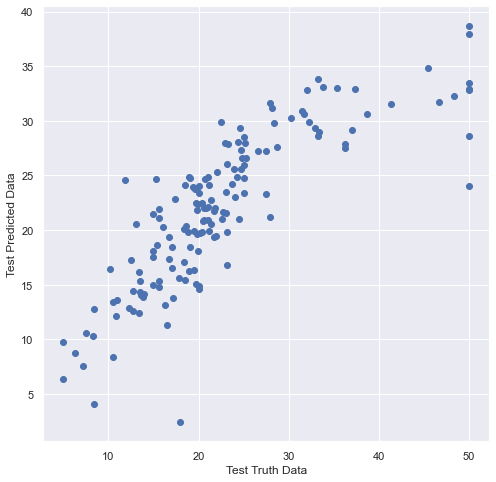

In [92]:
plt.scatter(y_test,elasticnet_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

C:\Users\22789\Downloads\WPy64-31040\python-3.10.4.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRICE'>

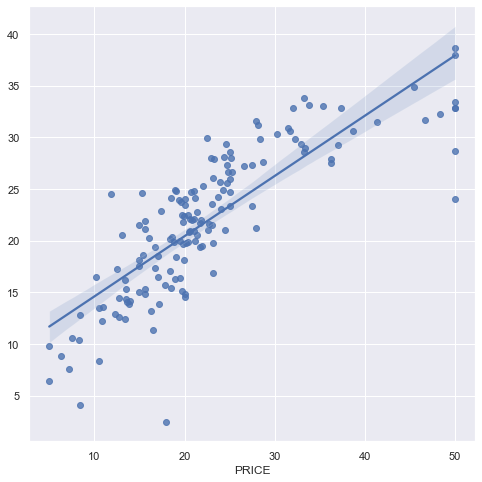

In [93]:
sns.regplot(y_test,elasticnet_pred)

In [94]:
#Residuals
elasticnet_residuals=y_test-elasticnet_pred
elasticnet_residuals

505   -12.645152
134     0.765887
56     -2.590133
176    -2.844823
28     -1.734533
         ...    
228    14.988107
18      0.462791
152    -9.347274
166    17.213380
415    -0.365236
Name: PRICE, Length: 152, dtype: float64

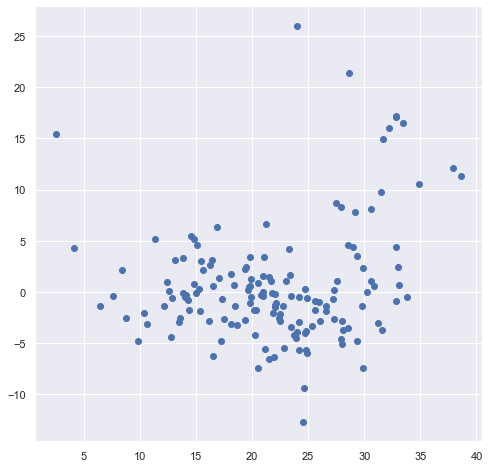

In [95]:
#Scatter plot with predictions and residual
#uniform distribution
plt.scatter(elasticnet_pred,elasticnet_residuals)

C:\Users\22789\Downloads\WPy64-31040\python-3.10.4.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='PRICE'>

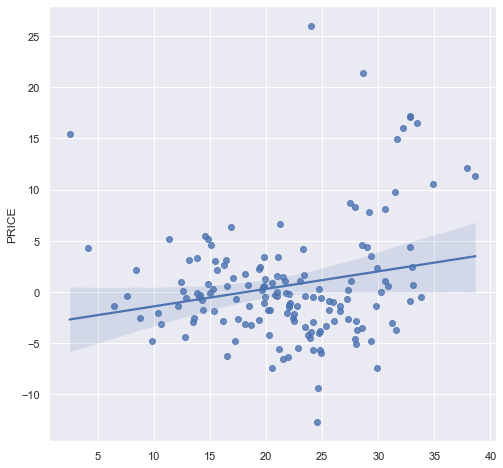

In [96]:
sns.regplot(elasticnet_pred,elasticnet_residuals)

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elasticnet_pred))
print(mean_absolute_error(y_test,elasticnet_pred))
print(np.sqrt(mean_squared_error(y_test,elasticnet_pred)))

32.96882217521494
3.7934572120626897
5.741848323947171


In [98]:
from sklearn.metrics import r2_score
elasticnet_score=r2_score(y_test,elasticnet_pred)
print(elasticnet_score)

0.6639119009191606


In [99]:
#Adjusted R square
#Display adjusted R-squared
1 - (1-elasticnet_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6322514278173424